<a href="https://colab.research.google.com/github/gaoliyao/ReflectionExperiments/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

    100% |████████████████████████████████| 592.3MB 47.4MB/s 


In [0]:
%pylab inline

import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [0]:
from torchvision import datasets, transforms

batch_size = 1
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size)

Processing...
Done!


  dog horse  ship horse


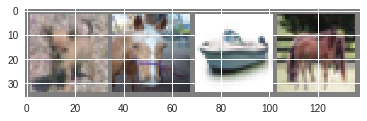

In [0]:
import matplotlib.pyplot as plt

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()


In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class SequentialNet(nn.Module):
    def __init__(self):
        super(SequentialNet, self).__init__()
        self.linear1 = nn.Linear(3*32*32, 1024)
        
        self.linear2 = nn.Linear(1024, 256)
        self.linear3 = nn.Linear(256, 10)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x.view(1, -1)))
        h_linr1 = self.linear2(h_relu)
#         h_linr2 = self.linear3(h_linr1)
#         h_linr3 = self.linear4(h_linr2)
#         h_linr4 = self.linear5(h_linr3)
        #y_yred = self.linear3(h_linr)
#         h_linr3 = self.linear4(h_linr2)
#         h_linr4 = self.linear5(h_linr3)
#         h_linr5 = self.linear6(h_linr4)
#         h_linr6 = self.linear7(h_linr5)
        y_pred = self.linear3(h_linr1)
        return y_pred


net = SequentialNet()

In [0]:
use_cuda = True

In [0]:
if use_cuda and torch.cuda.is_available():
    net.cuda()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(net.parameters(), lr=0.00011, weight_decay=0.00115)
#optimizer = optim.Adam(net.parameters(), lr=1e-4, eps=1e-4)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [0]:
for epoch in range(1):  # loop over the dataset multiple times 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        images, labels = Variable(images), Variable(labels)

        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
#         print(type(predicted))
#         print(predicted)
#         print(type(labels))
#         print(labels)
        correct += (predicted == labels.data).sum()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

print('Finished Training')




[1,  2000] loss: 2.302
[1,  4000] loss: 2.170
[1,  6000] loss: 1.833
[1,  8000] loss: 1.684
[1, 10000] loss: 1.593
[1, 12000] loss: 1.556
Accuracy of the network on the 10000 test images: 45 %
Finished Training


In [0]:
for data in testloader:
    images, labels = data
    images, labels = Variable(images), Variable(labels)

    if use_cuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
#     print(type(predicted))
#     print(predicted)
#     print(type(labels))
#     print(labels)
    correct += (predicted == labels.data).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %


In [0]:
for data in trainloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

RuntimeError: ignored

GroundTruth:    cat  ship  ship plane


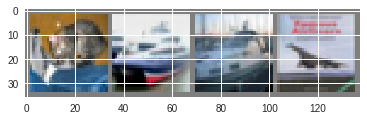

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(Variable(images))

In [0]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [0]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net[0](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net[1](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net[2](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net[3](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

TypeError: ignored

In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net[0](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
print("------------------------")    
    
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net[1](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
print("------------------------")
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net[2](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
print("------------------------")
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net[3](Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 61 %
Accuracy of  bird : 39 %
Accuracy of   cat : 25 %
Accuracy of  deer : 47 %
Accuracy of   dog : 63 %
Accuracy of  frog : 75 %
Accuracy of horse : 55 %
Accuracy of  ship : 75 %
Accuracy of truck : 60 %
------------------------
Accuracy of plane : 68 %
Accuracy of   car : 75 %
Accuracy of  bird : 38 %
Accuracy of   cat : 50 %
Accuracy of  deer : 41 %
Accuracy of   dog : 41 %
Accuracy of  frog : 70 %
Accuracy of horse : 51 %
Accuracy of  ship : 57 %
Accuracy of truck : 68 %
------------------------
Accuracy of plane : 34 %
Accuracy of   car : 65 %
Accuracy of  bird : 30 %
Accuracy of   cat : 31 %
Accuracy of  deer : 47 %
Accuracy of   dog : 48 %
Accuracy of  frog : 56 %
Accuracy of horse : 66 %
Accuracy of  ship : 87 %
Accuracy of truck : 53 %
------------------------


Process Process-164:
Process Process-163:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock

KeyboardInterrupt: ignored

GroundTruth:   ship   cat   car  bird


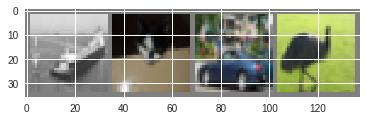

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net[0](Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

outputs = net[1](Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

outputs = net[2](Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

outputs = net[3](Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship   dog   car  bird
Predicted:  plane   dog   car  deer
Predicted:   ship  bird  ship horse
Predicted:  plane   dog   car  bird
